# Обучение без учителя


## Подготовка датасета

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# загрузка данных и структура данных
dataset=pd.read_csv('/content/drive/MyDrive/20.11.24/Spotifyy5.csv')
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset = dataset.sample(frac=1)
dataset.head()
cols = dataset.columns


In [4]:
cols

Index(['artists', 'acousticness', 'instrumentalness', 'valence',
       'mmpopularity', 'track_genre'],
      dtype='object')

In [5]:
vals = dataset["track_genre"].unique()
vals

array([1, 3, 0, 5, 8, 2, 6, 4, 7])

In [6]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
df= dataset.drop(['track_genre'], axis=1) # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [7]:
cols_for_clusters = df.columns

In [8]:
X = df
y = dataset["track_genre"]
yvals = dataset["track_genre"]

# Линейные методы уменьшения размерности (Linear Dimensionality Reduction Methods)

* Principal Component Analysis (PCA)
* Independent Component Analysis (ICA)





### Метод главных компонентов (Principal Component Analysis, PCA)

PCA — это метод на основе проекций, который часто используется для уменьшения размерности больших наборов данных путем преобразования большого набора переменных в меньший, который по-прежнему содержит большую часть информации о большом наборе.



In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [10]:
# Цвета

In [11]:
# N различных цветов
def spec(N):
    t = np.linspace(-510, 510, N)
    return np.round(np.clip(np.stack([-t, 510-np.abs(t), t], axis=1), 0, 255)).astype(np.uint8)

In [12]:
def rgb_to_hex(N):
  return ['#%02x%02x%02x' % (x[0], x[1], x[2]) for x in spec(N)]


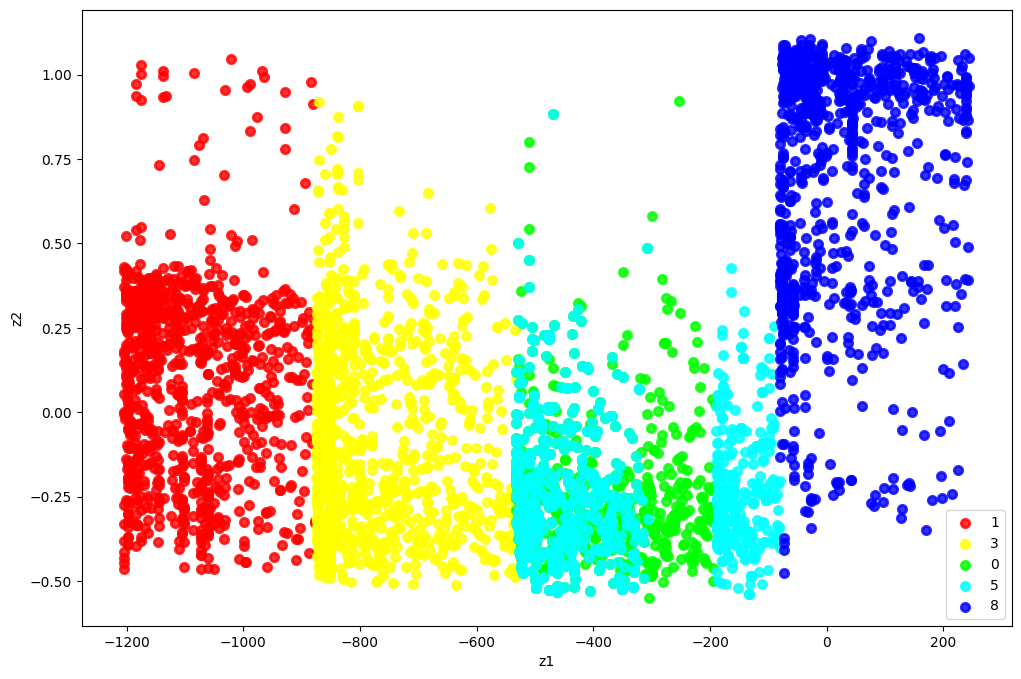

In [13]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = rgb_to_hex(5)
lw = 2

for color, i, target_name in zip(colors, np.arange(5), cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()


Функция для оценки того, насколько каждый главный компонент сохраняет информацию о дисперсии наших данных, является функция explained_variance_ratio.



In [14]:
pca.explained_variance_ratio_

array([9.99999276e-01, 3.07166359e-07])

Как вы можете видеть выше, первые главные компоненты сохраняют 99% дисперсии набора данных Spotifyyy5, тогда как вторые главные компоненты сохраняют только 0.003% дисперсии. Это указывает на то, что мы, получили хороший результат.

### Независимый анализ компонентов (Independent Component Analysis, ICA)


In [15]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

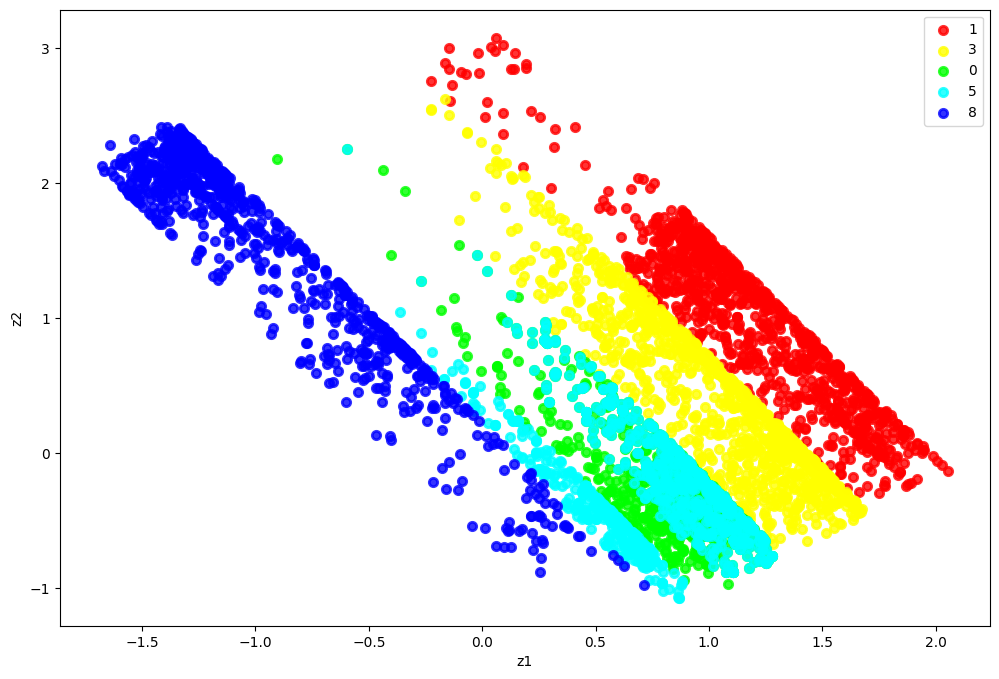

In [16]:
plt.figure(figsize=(12,8))
lw = 2

for color, i, target_name in zip(colors,  np.arange(5), cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Вывод по линейным методам: Признаки 3(зеленый) и 4(голубой) зависят друг от друга

#Нелинейные методы уменьшения размерности

Методы нелинейного преобразования, также известные как методы многообразного обучения, используются, когда данные не лежат в линейном подпространстве. Она основана на гипотезе многообразия, которая гласит, что в многомерной структуре большая часть релевантной информации концентрируется в небольшом числе многообразий низкой размерности.



### Kernel PCA


In [17]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

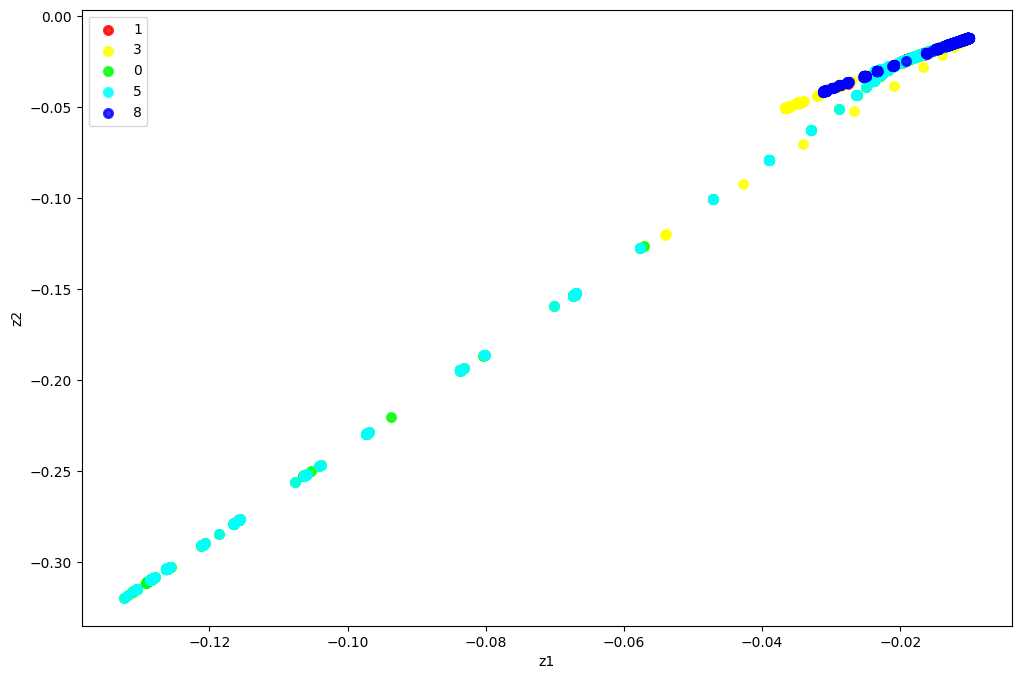

In [18]:
plt.figure(figsize=(12,8))
lw = 2

for color, i, target_name in zip(colors,  np.arange(5), cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

### tSNE

t-SNE - метод, который использует поэтапный итерационный подход для низкоразмерного представления исходных данных с сохранением информации об их локальном соседстве.


In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [20]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (8521, 5)
New Shape of X:  (8521, 2)
Kullback-Leibler divergence after optimization:  0.2723821997642517
No. of iterations:  999


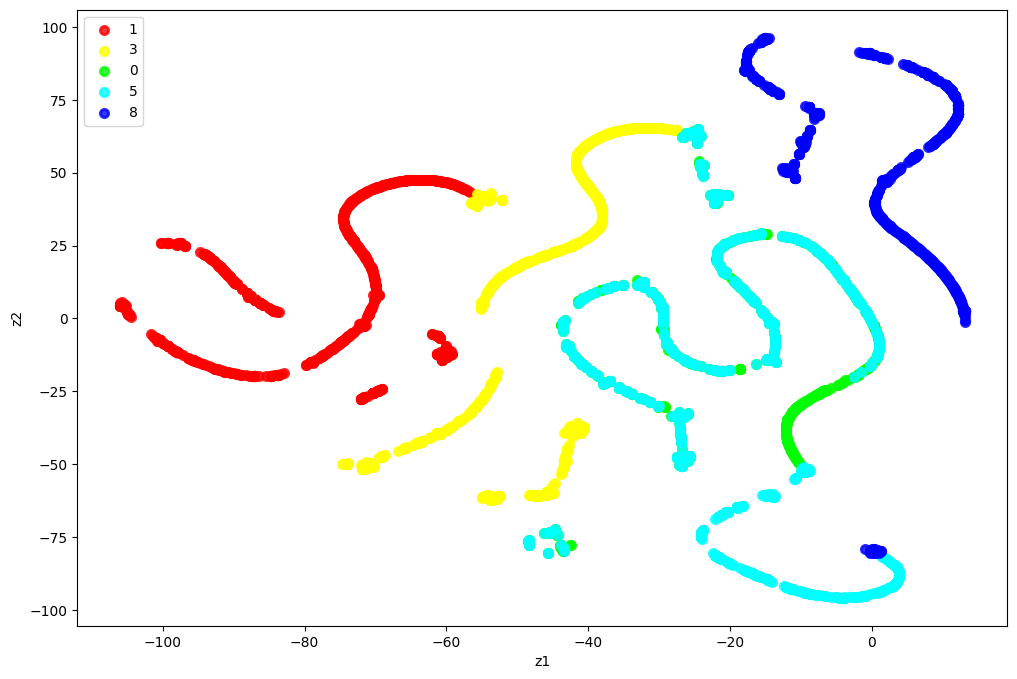

In [21]:
plt.figure(figsize=(12,8))
lw = 2

for color, i, target_name in zip(colors,  np.arange(5), cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Поиск выбросов. DBSCAN

DBSCAN расшифровывается как Density-Based Spatial Clustering of Applications with Noise. Он принадлежит к семейству алгоритмов кластеризации с неконтролируемым обучением.



## DBSCAN для кластеризации

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [45]:
dbscan_cluster1 = DBSCAN(eps = 2.5, min_samples = 9) # eps 2.5 подобрали исходя из шага с получением eps по правилу локтя
dbscan_cluster1.fit(X)

DBSCAN(eps=2.5, min_samples=9)

In [35]:
# Number of Clusters
labels=dbscan_cluster1.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print(f'Estimated no. of clusters: {N_clus}')

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print(f'Estimated no. of noise points: {n_noise}')

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 94
Estimated no. of noise points: 739
v_measure = 0.664682893140192


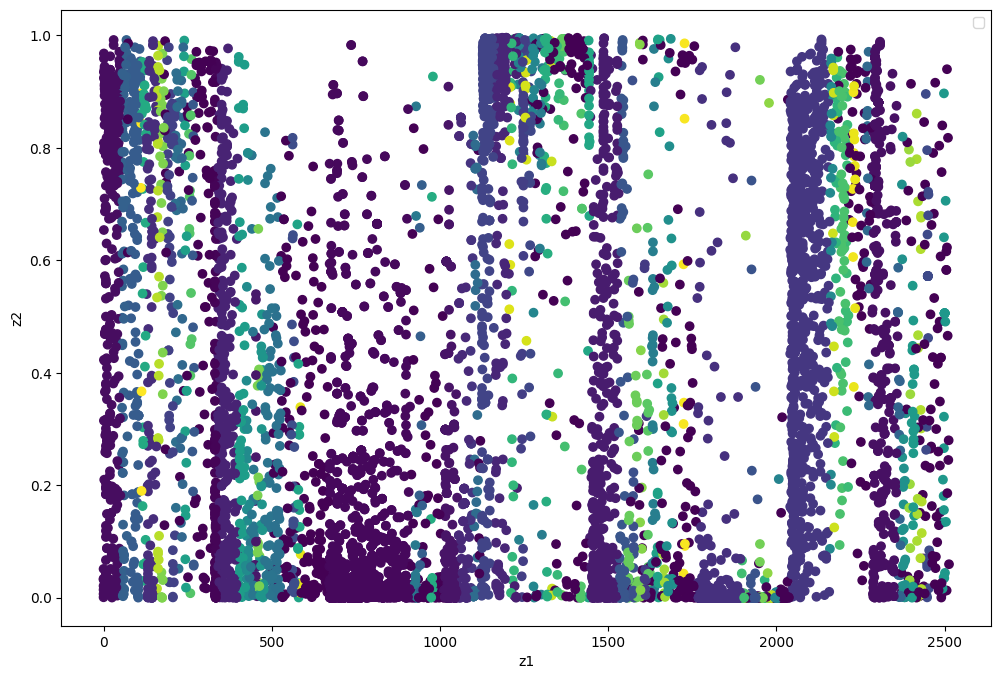

In [36]:
plt.figure(figsize=(12,8))
lw = 2

plt.scatter(
        X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

Подробнее о NearestNeighbors можно почитать тут:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors

In [37]:
from sklearn.neighbors import NearestNeighbors

min_samples = 9

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

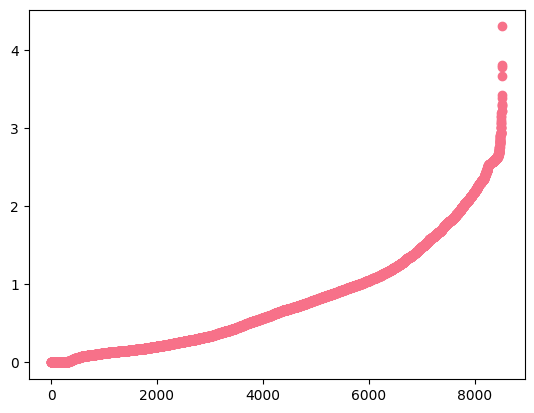

In [39]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

eps  выбирают в точке изгиба графика, в данном случае eps = 2.5

## DBSCAN для определения выбросов

In [40]:
dbscan = DBSCAN(eps = 2.5, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=2.5, min_samples=9)


In [41]:
pred = dbscan.fit_predict(X)

In [42]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 94
Estimated no. of noise points: 739
v_measure = 0.664682893140192


In [43]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

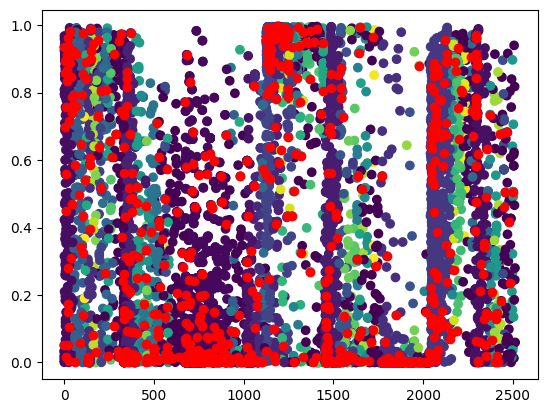

In [44]:
plt.scatter( X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[0]], values[cols[1]], color='r')
plt.show()

# Задание

1. Изучить теорию
1. Реализовать рассмотренные методы на своем датасете (признаков должно быть более 5)
1. Визуализировать результаты